In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from lxml import etree
from matplotlib.patches import Rectangle
import numpy as np
import glob

In [2]:
tf.__version__

'2.0.0'

In [3]:
tf.test.is_gpu_available()

True

In [4]:
img = tf.io.read_file(r'./images/Abyssinian_1.jpg')

In [5]:
img = tf.image.decode_jpeg(img)

In [6]:
img.shape

TensorShape([400, 600, 3])

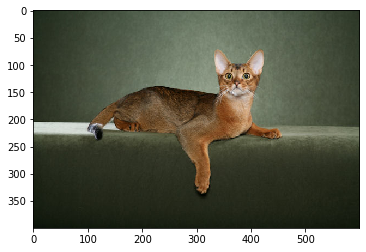

In [7]:
plt.imshow(img.numpy())
plt.show()

In [8]:
xml = open(r'./annotations/xmls/Abyssinian_1.xml').read()

In [9]:
sel = etree.HTML(xml)

In [10]:
width = sel.xpath('//size/width/text()')[0]
width

'600'

In [11]:
height = sel.xpath('//size/height/text()')[0]
height

'400'

In [12]:
xmin = sel.xpath('//bndbox/xmin/text()')[0]
xmin

'333'

In [13]:
ymin = sel.xpath('//bndbox/ymin/text()')[0]
xmax = sel.xpath('//bndbox/xmax/text()')[0]
ymax = sel.xpath('//bndbox/ymax/text()')[0]

In [14]:
ymin, xmax, ymax

('72', '425', '158')

In [15]:
width = int(width)
height = int(height)

In [16]:
xmin = int(xmin)
ymin = int(ymin)
xmax = int(xmax)
ymax = int(ymax)

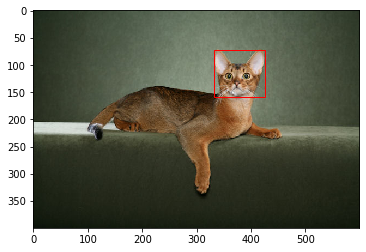

In [17]:
plt.imshow(img.numpy())
rect = Rectangle((xmin, ymin), (xmax-xmin), (ymax-ymin), fill=False, color='red')
ax = plt.gca()
ax.axes.add_patch(rect)
plt.show()

In [18]:
img = tf.image.resize(img, [224, 224])

In [19]:
img = img/255

In [20]:
xmin = xmin*224/width
ymin = ymin*224/height
xmax = xmax*224/width
ymax = ymax*224/height

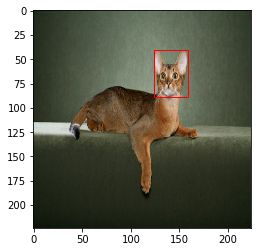

In [21]:
plt.imshow(img.numpy())
rect = Rectangle((xmin, ymin), (xmax-xmin), (ymax-ymin), fill=False, color='red')
ax = plt.gca()
ax.axes.add_patch(rect)
plt.show()

# 创建输入管道

In [22]:
images = glob.glob('./images/*.jpg')

In [23]:
images[:5]

['./images\\Abyssinian_1.jpg',
 './images\\Abyssinian_10.jpg',
 './images\\Abyssinian_100.jpg',
 './images\\Abyssinian_101.jpg',
 './images\\Abyssinian_102.jpg']

In [24]:
len(images)

7390

In [25]:
xmls = glob.glob('./annotations/xmls/*.xml')

In [26]:
xmls[:5]

['./annotations/xmls\\Abyssinian_1.xml',
 './annotations/xmls\\Abyssinian_10.xml',
 './annotations/xmls\\Abyssinian_100.xml',
 './annotations/xmls\\Abyssinian_101.xml',
 './annotations/xmls\\Abyssinian_102.xml']

In [27]:
images[-5:]

['./images\\yorkshire_terrier_95.jpg',
 './images\\yorkshire_terrier_96.jpg',
 './images\\yorkshire_terrier_97.jpg',
 './images\\yorkshire_terrier_98.jpg',
 './images\\yorkshire_terrier_99.jpg']

In [28]:
len(xmls)

3686

In [29]:
xmls_names = [x.split('\\')[-1].split('.xml')[0] for x in xmls]

In [30]:
xmls_names[:3]

['Abyssinian_1', 'Abyssinian_10', 'Abyssinian_100']

In [31]:
len(xmls_names)

3686

In [32]:
images_names = [x.split('\\')[-1].split('.jpg')[0] for x in images]

In [33]:
images_names[:3]

['Abyssinian_1', 'Abyssinian_10', 'Abyssinian_100']

In [34]:
names = list(set(images_names)&set(xmls_names))

In [35]:
names[:3]

['english_cocker_spaniel_103',
 'english_cocker_spaniel_160',
 'newfoundland_182']

In [36]:
len(names)

3686

In [37]:
imgs = [img for img in images if img.split('\\')[-1].split('.jpg')[0] in names]

In [38]:
len(imgs)

3686

In [39]:
imgs[:3]

['./images\\Abyssinian_1.jpg',
 './images\\Abyssinian_10.jpg',
 './images\\Abyssinian_100.jpg']

In [40]:
imgs[-3:]

['./images\\yorkshire_terrier_188.jpg',
 './images\\yorkshire_terrier_189.jpg',
 './images\\yorkshire_terrier_190.jpg']

In [41]:
imgs.sort(key=lambda x: x.split('\\')[-1].split('.jpg')[0])

In [42]:
imgs[:3]

['./images\\Abyssinian_1.jpg',
 './images\\Abyssinian_10.jpg',
 './images\\Abyssinian_100.jpg']

In [43]:
imgs[-3:]

['./images\\yorkshire_terrier_188.jpg',
 './images\\yorkshire_terrier_189.jpg',
 './images\\yorkshire_terrier_190.jpg']

In [44]:
xmls.sort(key=lambda x: x.split('\\')[-1].split('.xml')[0])

In [45]:
xmls[:3]

['./annotations/xmls\\Abyssinian_1.xml',
 './annotations/xmls\\Abyssinian_10.xml',
 './annotations/xmls\\Abyssinian_100.xml']

In [46]:
xmls[-3:]

['./annotations/xmls\\yorkshire_terrier_188.xml',
 './annotations/xmls\\yorkshire_terrier_189.xml',
 './annotations/xmls\\yorkshire_terrier_190.xml']

In [47]:
scal = 224

In [48]:
def to_labels(path):
    xml = open(r'{}'.format(path)).read()
    sel = etree.HTML(xml)
    width = int(sel.xpath('//size/width/text()')[0])
    height = int(sel.xpath('//size/height/text()')[0])
    xmin = int(sel.xpath('//bndbox/xmin/text()')[0])
    ymin = int(sel.xpath('//bndbox/ymin/text()')[0])
    xmax = int(sel.xpath('//bndbox/xmax/text()')[0])
    ymax = int(sel.xpath('//bndbox/ymax/text()')[0])
    return [xmin/width, ymin/height, xmax/width, ymax/height]

In [49]:
labels = [to_labels(path) for path in xmls]

In [50]:
out1_label, out2_label, out3_label, out4_label = list(zip(*labels))

In [51]:
len(out1_label), len(out2_label), len(out3_label), len(out4_label)

(3686, 3686, 3686, 3686)

In [52]:
index = np.random.permutation(len(imgs))

In [53]:
images = np.array(imgs)[index]
#labels = labels[index]

In [54]:
out1_label = np.array(out1_label)[index]
out2_label = np.array(out2_label)[index]
out3_label = np.array(out3_label)[index]
out4_label = np.array(out4_label)[index]

In [55]:
label_datset = tf.data.Dataset.from_tensor_slices((
                                              out1_label, 
                                              out2_label, 
                                              out3_label, 
                                              out4_label))

In [56]:
image_dataset = tf.data.Dataset.from_tensor_slices(images)

In [57]:
label_datset

<TensorSliceDataset shapes: ((), (), (), ()), types: (tf.float64, tf.float64, tf.float64, tf.float64)>

In [58]:
def read_jpg(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    return img

In [59]:
def normalize(input_image):
    input_image = tf.image.resize(input_image, [scal, scal])
    input_image = tf.cast(input_image, tf.float32)/127.5 - 1
    return input_image

In [60]:
@tf.function
def load_image(input_image_path):
    input_image = read_jpg(input_image_path)
    input_image = normalize(input_image)
    return input_image

In [61]:
image_dataset = image_dataset.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)

In [62]:
image_dataset

<ParallelMapDataset shapes: (224, 224, 3), types: tf.float32>

In [63]:
dataset = tf.data.Dataset.zip((image_dataset, label_datset))

In [64]:
dataset

<ZipDataset shapes: ((224, 224, 3), ((), (), (), ())), types: (tf.float32, (tf.float64, tf.float64, tf.float64, tf.float64))>

In [65]:
test_count = int(len(images)*0.2)

In [66]:
test_count

737

In [67]:
train_count = len(images) - test_count

In [68]:
dataset_train = dataset.skip(test_count)

In [69]:
dataset_test = dataset.take(test_count)

In [70]:
BATCH_SIZE = 8
BUFFER_SIZE = 300
STEPS_PER_EPOCH = train_count // BATCH_SIZE
VALIDATION_STEPS = test_count // BATCH_SIZE

In [71]:
train_dataset = dataset_train.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = dataset_test.batch(BATCH_SIZE)

In [72]:
train_dataset

<PrefetchDataset shapes: ((None, 224, 224, 3), ((None,), (None,), (None,), (None,))), types: (tf.float32, (tf.float64, tf.float64, tf.float64, tf.float64))>

In [73]:
%matplotlib inline

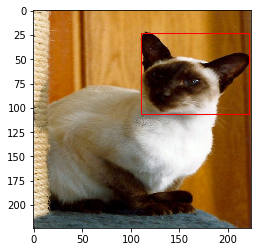

In [74]:
for img, label in train_dataset.take(1):
    plt.imshow(tf.keras.preprocessing.image.array_to_img(img[0]))
    out1, out2, out3, out4 = label
    xmin, ymin, xmax, ymax = (out1[0]).numpy()*scal, (out2[0]).numpy()*scal, (out3[0]).numpy()*scal, (out4[0]).numpy()*scal
    rect = Rectangle((xmin, ymin), (xmax-xmin), (ymax-ymin), fill=False, color='red')
    ax = plt.gca()
    ax.axes.add_patch(rect)

# 创建定位模型

In [76]:
xception = tf.keras.applications.Xception(weights='imagenet', 
                                          include_top=False,
                                          input_shape=(scal, scal, 3))

In [77]:
xception.trianable = False

In [78]:
inputs = tf.keras.layers.Input(shape=(scal, scal, 3))

x = xception(inputs)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

x = tf.keras.layers.Dense(2048, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)

out1 = tf.keras.layers.Dense(1)(x)
out2 = tf.keras.layers.Dense(1)(x)
out3 = tf.keras.layers.Dense(1)(x)
out4 = tf.keras.layers.Dense(1)(x)

predictions = [out1, out2, out3, out4]

model = tf.keras.models.Model(inputs=inputs, outputs=predictions)

In [79]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='mse',
              metrics=['mae'])

In [80]:
EPOCHS = 50

In [81]:
history = model.fit(train_dataset, 
                          epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=test_dataset)

Train for 368 steps, validate for 92 steps
Epoch 1/50
368/368 [==============================] - 367s 997ms/step - loss: 0.0782 - dense_2_loss: 0.0180 - dense_3_loss: 0.0116 - dense_4_loss: 0.0271 - dense_5_loss: 0.0216 - dense_2_mae: 0.1033 - dense_3_mae: 0.0835 - dense_4_mae: 0.1242 - dense_5_mae: 0.1108 - val_loss: 0.0639 - val_dense_2_loss: 0.0108 - val_dense_3_loss: 0.0132 - val_dense_4_loss: 0.0141 - val_dense_5_loss: 0.0258 - val_dense_2_mae: 0.0802 - val_dense_3_mae: 0.0959 - val_dense_4_mae: 0.0924 - val_dense_5_mae: 0.1321
Epoch 2/50
368/368 [==============================] - 360s 978ms/step - loss: 0.0301 - dense_2_loss: 0.0068 - dense_3_loss: 0.0053 - dense_4_loss: 0.0093 - dense_5_loss: 0.0088 - dense_2_mae: 0.0644 - dense_3_mae: 0.0569 - dense_4_mae: 0.0756 - dense_5_mae: 0.0736 - val_loss: 0.0349 - val_dense_2_loss: 0.0118 - val_dense_3_loss: 0.0042 - val_dense_4_loss: 0.0106 - val_dense_5_loss: 0.0082 - val_dense_2_mae: 0.0871 - val_dense_3_mae: 0.0502 - val_dense_4_mae

Epoch 33/50
368/368 [==============================] - 360s 979ms/step - loss: 0.0011 - dense_2_loss: 2.7454e-04 - dense_3_loss: 1.8542e-04 - dense_4_loss: 3.2781e-04 - dense_5_loss: 3.5344e-04 - dense_2_mae: 0.0127 - dense_3_mae: 0.0106 - dense_4_mae: 0.0140 - dense_5_mae: 0.0146 - val_loss: 0.0048 - val_dense_2_loss: 0.0012 - val_dense_3_loss: 9.6440e-04 - val_dense_4_loss: 0.0014 - val_dense_5_loss: 0.0012 - val_dense_2_mae: 0.0200 - val_dense_3_mae: 0.0235 - val_dense_4_mae: 0.0209 - val_dense_5_mae: 0.0220
Epoch 34/50
368/368 [==============================] - 360s 979ms/step - loss: 0.0010 - dense_2_loss: 2.3004e-04 - dense_3_loss: 2.0186e-04 - dense_4_loss: 3.0684e-04 - dense_5_loss: 3.0903e-04 - dense_2_mae: 0.0115 - dense_3_mae: 0.0108 - dense_4_mae: 0.0137 - dense_5_mae: 0.0136 - val_loss: 0.0045 - val_dense_2_loss: 0.0012 - val_dense_3_loss: 7.0800e-04 - val_dense_4_loss: 0.0015 - val_dense_5_loss: 0.0011 - val_dense_2_mae: 0.0212 - val_dense_3_mae: 0.0183 - val_dense_4_mae:

Epoch 49/50
368/368 [==============================] - 358s 972ms/step - loss: 4.9366e-04 - dense_2_loss: 1.1751e-04 - dense_3_loss: 8.8984e-05 - dense_4_loss: 1.3848e-04 - dense_5_loss: 1.4870e-04 - dense_2_mae: 0.0084 - dense_3_mae: 0.0072 - dense_4_mae: 0.0091 - dense_5_mae: 0.0093 - val_loss: 0.0040 - val_dense_2_loss: 0.0011 - val_dense_3_loss: 7.4575e-04 - val_dense_4_loss: 9.1348e-04 - val_dense_5_loss: 0.0013 - val_dense_2_mae: 0.0216 - val_dense_3_mae: 0.0161 - val_dense_4_mae: 0.0178 - val_dense_5_mae: 0.0208
Epoch 50/50
368/368 [==============================] - 358s 972ms/step - loss: 4.0007e-04 - dense_2_loss: 9.9794e-05 - dense_3_loss: 7.8772e-05 - dense_4_loss: 1.1732e-04 - dense_5_loss: 1.0418e-04 - dense_2_mae: 0.0078 - dense_3_mae: 0.0068 - dense_4_mae: 0.0084 - dense_5_mae: 0.0080 - val_loss: 0.0038 - val_dense_2_loss: 9.1234e-04 - val_dense_3_loss: 7.4782e-04 - val_dense_4_loss: 9.4812e-04 - val_dense_5_loss: 0.0012 - val_dense_2_mae: 0.0184 - val_dense_3_mae: 0.016

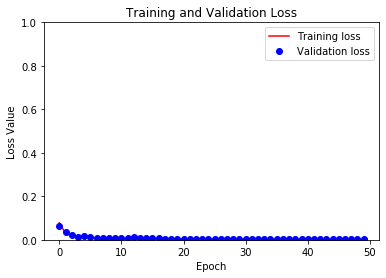

In [82]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(EPOCHS)

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

# 模型保存

In [84]:
model.save('detect_v1.h5')

In [75]:
new_model = tf.keras.models.load_model('detect_v1.h5')

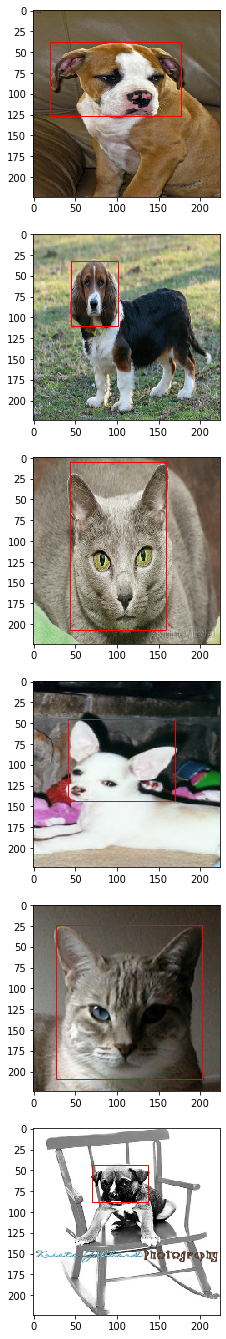

In [77]:
plt.figure(figsize=(8, 24))
for img, _ in test_dataset.take(1):
    out1, out2, out3, out4 = new_model.predict(img)
    for i in range(6):
        plt.subplot(6, 1, i+1)
        plt.imshow(tf.keras.preprocessing.image.array_to_img(img[i]))
        xmin, ymin, xmax, ymax = out1[i]*224, out2[i]*224, out3[i]*224, out4[i]*224,
        rect = Rectangle((xmin, ymin), (xmax-xmin), (ymax-ymin), fill=False, color='red')
        ax = plt.gca()
        ax.axes.add_patch(rect)